In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/myopia.csv"
MyopiaData = pd.read_csv(url)

In [3]:
MyopiaData.head()

,ID,STUDYYEAR,MYOPIC,AGE,GENDER,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,1,1992,1,6,1,-0.052,21.89,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,2,1995,0,6,1,0.608,22.38,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,3,1991,0,6,1,1.179,22.49,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,4,1990,1,6,1,0.525,22.20,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,1995,0,5,0,0.697,23.29,3.676,3.454,16.16,14,0,0,0,4,4,1,0


Here is our dataset dictionary: https://www.umass.edu/statdata/statdata/data/myopia.pdf

#### We are interested in finding out what contributes to Myopia the most. My grandmother always told me not to watch TV, play with computer since it will affect my eyes. (She was strangely fine with studying!). It sounds like Drs share the same point of view with my grandmother " http://www.allaboutvision.com/conditions/myopia.htm "

#### We are Data Scientists and don't trust our grandmothers or DRs unless we find the same result! Now, let's go and explore Myopia!




In [4]:
# Year of study and id should not affect anything so we disregard them in this study. 
# we consider two types of inputs - first all general inputs - i.e. physical and external inputs
# second only external inputs
X1 = MyopiaData[['SPHEQ','AL','ACD','LT','VCD','AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]
X2 = MyopiaData[['AGE','GENDER','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']]
y = MyopiaData['MYOPIC']


Run your regression line on X1 and interpret your MOMMY AND DADMY coefficients.

In [5]:
lm = LogisticRegression()
lm.fit(X1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
zip(X1.columns.values,lm.coef_[0])

[('SPHEQ', -3.3942542632369896),
 ('AL', 0.11608687897257743),
 ('ACD', 0.77257188653390674),
 ('LT', -0.31202015836839203),
 ('VCD', -0.32603700949954018),
 ('AGE', 0.0037903377945019867),
 ('GENDER', 0.53625125528914097),
 ('SPORTHR', -0.047395193208825327),
 ('READHR', 0.097641797508110625),
 ('COMPHR', 0.05015847699789077),
 ('STUDYHR', -0.13224776658632248),
 ('TVHR', -0.0043863599263253691),
 ('DIOPTERHR', -0.0078873131668882289),
 ('MOMMY', 0.63899595306244383),
 ('DADMY', 0.72678879287330134)]

Interpretation: Variables SPHEQ, AL, ACD, LT, VCD, AGE, and GENDER all decrease the odds of Myopia while SPORTHR, READHR, COMPHR, STUDYHR, TVHR, DIOPTERHR, MOMMY, and DADMY all increase the odds

#### Use confusion matrix and estimate False negative rate and False positive rate

In [7]:
#print confusion_matrix(lm.predict(X1),y)
print pd.crosstab(y, lm.predict(X1), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted    0   1  All
True                   
0          524  13  537
1           53  28   81
All        577  41  618


False negative rate: FN/P = 53/81 = 65.4%
False positive rate: FP/N = 13/537 = 2.4%

#### Use 10-fold cross-validation to measure accuracy of your predictions

In [8]:
cross_val_score(lm,X1,y,cv=10).mean() #The accuracy is 88.7%

0.88674716493330974

#### In your dataset, what percentage of cases are myopic?

In [9]:
print float(MyopiaData['MYOPIC'].sum())/float(len(MyopiaData))

0.131067961165


#### Based on the result you found above, is your prediction precision good or bad?

Answer: Because the model correctly predicts myopia 88.7% of the time and the condition is only prevalent in 13% of the population, this model is not precise, as it is only slightly better than predicting no myopia for all subjects

#### Imagine you would like to decrease your False negative rate. What can you do in order to make it less than 2%? 

Answer: Lower the threshold for predicting Myopia. Under 2% would mean that <= 1 false negative exists in the 

In [10]:
def PredictThreshold(Predictprob,Threshhold):
    y_predict = 0
    if (Predictprob >= Threshhold):
        y_predict = 1
    return y_predict

In [11]:
y_hat_prob = lm.predict_proba(X1).T[1]
threshold = 0.02
y_hat_new_thresh = []
for i in y_hat_prob:
    y_hat_new_thresh.append(PredictThreshold(i,threshold))

In [12]:
pd.crosstab(y, np.array(y_hat_new_thresh), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,180,357,537
1,1,80,81
All,181,437,618


#### Now let's run a logistic regression line on X2 and see if we can confirm our Grandmothers' claims!

In [13]:
lm = LogisticRegression()
lm.fit(X2,y)
print pd.crosstab(y, lm.predict(X2), rownames=['True'], colnames=['Predicted'], margins=True)
zip(X2.columns.values,lm.coef_[0])

Predicted    0  All
True               
0          537  537
1           81   81
All        618  618


[('AGE', -0.14479550366267491),
 ('GENDER', 0.2454163226450089),
 ('SPORTHR', -0.04711948829944048),
 ('READHR', 0.068796635148855645),
 ('COMPHR', 0.0093704732839794101),
 ('STUDYHR', -0.071573634555331),
 ('TVHR', -0.0036419364035920406),
 ('DIOPTERHR', 0.0067680119445780096),
 ('MOMMY', 0.72829062308455994),
 ('DADMY', 0.83081272891196278)]

Interpret your results specifically on StudyHr, TVH, COMPHR, and Gender: 

STUDYHR and TVHR have negative coefficients, meaning that more time spent studying and watching TV decrease the odds of Myopia. Meanwhile COMPHR and GENDER have positive coefficients, meaning that looking at the computer and being a female increase the odds of Myopia.

#### Now it's time for regularization and choosing the best predictors:

In [14]:
#Let's first standardize our data - use X1
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X-X_Min)/(X_Max - X_Min)
    return X_Standardized

standard_X1 = Standardize(X1)

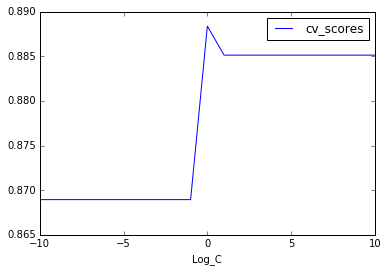

In [15]:
# Try testing and plot using different C as input and l1 penalty
c_list = np.logspace(-10,10,21) 
c_index = np.linspace(-10,10,21)
cv_scores = []
for c_score in c_list:
    lm = LogisticRegression(C = c_score,penalty = "l1") #Setting penalty to l1 specifies ridge regression, l2 is ridge
    cv_scores.append(cross_val_score(lm,standard_X1,y,cv=10).mean())
    
C_Choice_df = pd.DataFrame({'cv_scores': cv_scores ,'Log_C': c_index })
C_Choice_df.plot(x ='Log_C',y = 'cv_scores' )

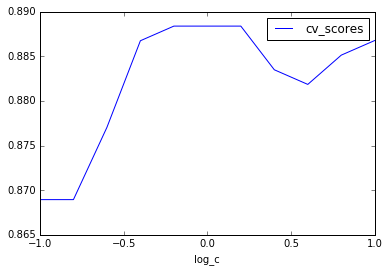

In [16]:
# localize your search around the maximum value you found earlier
c_list = np.logspace(-1,1,11)
c_index = np.linspace(-1,1,11)
cv_scores = []
for c in c_list:
    lm = LogisticRegression(C=c, penalty="l1")
    cv_scores.append(cross_val_score(lm,standard_X1,y,cv=10).mean())
    
c_df = pd.DataFrame({'cv_scores':cv_scores,'log_c':c_index})
c_df.plot(x='log_c',y='cv_scores')

In [17]:
# List your variables from the smallest to the largest
# Use value of c = 10**(0) = 1 based on the above analysis
lm = LogisticRegression(C=1,penalty="l1")
lm.fit(X1,y)
pd.DataFrame({'variable':X1.columns.values,'coefficient value':lm.coef_[0]}).sort_index()

,coefficient value,variable
0,-3.803809,SPHEQ
1,0.000000,AL
2,0.761558,ACD
3,0.000000,LT
4,-0.201753,VCD
5,0.000000,AGE
6,0.492612,GENDER
7,-0.048635,SPORTHR
8,0.070510,READHR
9,0.032730,COMPHR


#### What is your conclusions about your Grandmothers' and some other Drs' claims?

Answer: The greatest factors that influence the odds of myopia are SPHEQ and parent history, all of which are not based on behavior. Thus, the amount of time spent doing certain behaviors does not factor into the odds of Myopia

#### Draw ROC curve for your best tuned model. 

0.895762926179


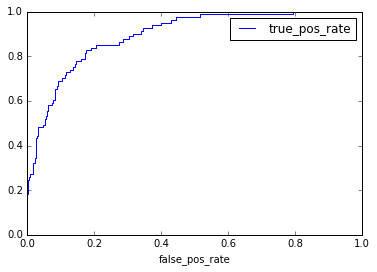

In [18]:
y_hat_prob = lm.predict_proba(X1)[:,1]
print roc_auc_score(y,y_hat_prob)
vals = roc_curve(y,y_hat_prob)
roc_df = pd.DataFrame({'false_pos_rate':vals[0],'true_pos_rate':vals[1]})
roc_df.plot(x='false_pos_rate',y='true_pos_rate')